## Uppgift 1

Du står närmst en: Pichu


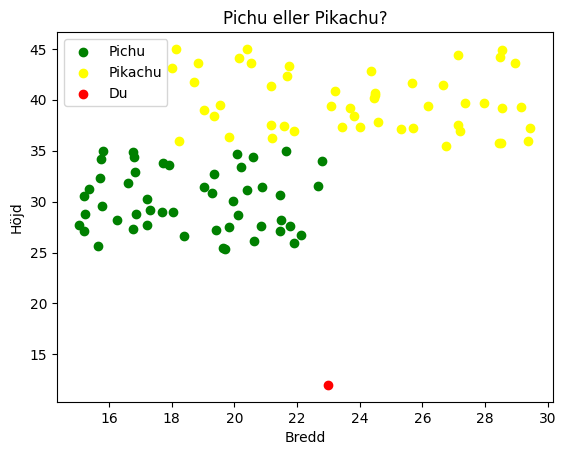

In [18]:
import numpy as np
import matplotlib.pylab as plt

# Frågar användaren efter bredd och höjd och returnerar dessa som en numpy array.
def input_test_point():
    while True:
        try:
            user_width = float(input("Ange bredd: "))
            user_height = float(input("Ange höjd: "))
            
            if user_width < 0 or user_height < 0:
                print("Både bredden och höjden måste vara positiva tal. Försök igen.")
            else:
                return np.array([user_width, user_height])
                
        except ValueError:
            print("Ogiltig inmatning. Använd enbart numeriska värden.")

# Läser in data från en fil och returnerar den som en numpy array, ignorerar rubrikrader.
def load_data_from_file(filename):
    data = []  # Skapar en tom lista för att lagra data
    filepath = f'../Data/{filename}'  # sökväg till filen
    with open(filepath, 'r') as file:  # Öppnar filen för läsning ('r')
        next(file)  # Hoppar över rubrikraden
        for line in file:  # Itererar över varje rad i filen
            try:
                # Bortser från parenteserna och delar upp raden vid kommatecknet och tar bort mellanrum
                width, height = line.strip().replace('(','').replace(')','').split(',')  
                data.append([float(width), float(height)])  # Konverterar till float och lägger till i listan
            except ValueError:
                # Ignorerar rader som inte kan konverteras till float
                continue
    return np.array(data)  # Returnerar datan som en numpy array


#Beräknar och returnerar Euklidiskt avstånd mellan två punkter.
def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Klassificerar en testpunkt som Pichu eller Pikachu genom att jämföra avstånd.
def classify_point(test_point, pichu_data, pikachu_data):
    # Initialiserar avstånden till en mycket hög siffra(inf = oändligheten) Man gör detta för att man inte ska kunna uppnå det värdet genom de inputs man gör som användare.
    nearest_pichu_distance = nearest_pikachu_distance = float('inf')
    
    # Går igenom alla Pichu punkter och uppdaterar närmaste avstånd
    for point in pichu_data:
        distance = calculate_distance(test_point, point)
        if distance < nearest_pichu_distance:
            nearest_pichu_distance = distance
    
    # Gör samma för Pikachu punkter
    for point in pikachu_data:
        distance = calculate_distance(test_point, point)
        if distance < nearest_pikachu_distance:
            nearest_pikachu_distance = distance
    
    # Jämför avstånden och returnerar klassificeringen
    if nearest_pichu_distance < nearest_pikachu_distance:
        return 'Pichu'
    else:
        return 'Pikachu'

# Laddar in data
pichu_array = load_data_from_file('pichu.txt')
pikachu_array = load_data_from_file('pikachu.txt')

# Frågar efter testpunkt från användaren
test_point = input_test_point()

classification = classify_point(test_point, pichu_array, pikachu_array)
print(f"Du står närmst en: {classification}")

# Plottar datan
plt.scatter(pichu_array[:, 0], pichu_array[:, 1], color='green', label='Pichu')
plt.scatter(pikachu_array[:, 0], pikachu_array[:, 1], color='yellow', label='Pikachu')
plt.scatter(test_point[0], test_point[1], color='red', label='Du')
plt.title('Pichu eller Pikachu?')
plt.xlabel('Bredd')
plt.ylabel('Höjd')
plt.legend()
plt.show()


In [6]:
# för att säkerställa så mina filer ligger där jag tänkt
import os
print(os.getcwd())

print(os.listdir('../Data'))


c:\Users\joelh\OneDrive\Skrivbord\Document\Github\Python-Joel-Holmberg-OPA23\Labbar
['.Gitkeep', 'calories.xlsx', 'ml_text_cleaned.txt', 'ml_text_raw.txt', 'pichu.txt', 'pikachu.txt', 'student-mat-missing-data.csv']


## Upggift 2

Du står närmst en: Pichu


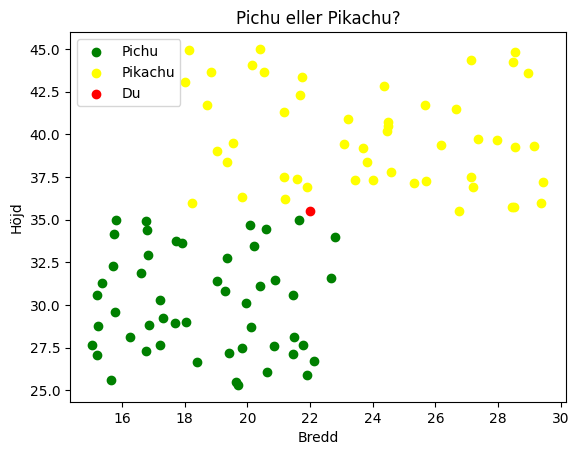

In [26]:
#Klassificerar en testpunkt som Pichu eller Pikachu genom att jämföra de 5 närmaste grannarna.
def classify_point(test_point, pichu_data, pikachu_data):
    # Skapa en lista för att hålla avstånd och klasser
    distances = []
    
    # Lägg till alla Pichu-punkter och deras avstånd till listan
    for point in pichu_data:
        distance = calculate_distance(test_point, point)
        distances.append((distance, 'Pichu'))
    
    # Gör samma för Pikachu-punkter
    for point in pikachu_data:
        distance = calculate_distance(test_point, point)
        distances.append((distance, 'Pikachu'))
    
    # Sortera listan efter avstånd
    distances.sort(key=lambda x: x[0])
    
    # Ta de 5 närmaste grannarna
    nearest = distances[:5]
    
    # Räkna klasserna hos de närmaste grannarna
    pichu_count = sum(1 for dist, label in nearest if label == 'Pichu')
    pikachu_count = 5 - pichu_count  # Eftersom vi endast har två klasser
    
    # Klassificera baserat på majoritet
    if pichu_count > pikachu_count:
        return 'Pichu'
    else:
        return 'Pikachu'

# Frågar efter testpunkt från användaren
test_point = input_test_point()

classification = classify_point(test_point, pichu_array, pikachu_array)
print(f"Du står närmst en: {classification}")

# Plottar datan
plt.scatter(pichu_array[:, 0], pichu_array[:, 1], color='green', label='Pichu')
plt.scatter(pikachu_array[:, 0], pikachu_array[:, 1], color='yellow', label='Pikachu')
plt.scatter(test_point[0], test_point[1], color='red', label='Du')
plt.title('Pichu eller Pikachu?')
plt.xlabel('Bredd')
plt.ylabel('Höjd')
plt.legend()
plt.show()
